In [1]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

Dados carregados com sucesso para a estação: 2552000
Total de 5193 dias válidos no período selecionado.


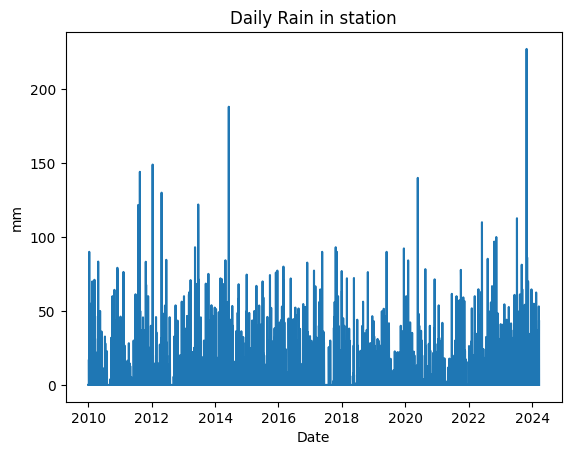

In [2]:
import access_br_dwgd

timeseries = access_br_dwgd.recuperar_dados_br_dwgd(False)

train_size = int(len(timeseries) * 0.7)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]

plt.plot(timeseries)
plt.title('Daily Rain in station')
plt.xlabel('Date')
plt.ylabel('mm')
plt.show()


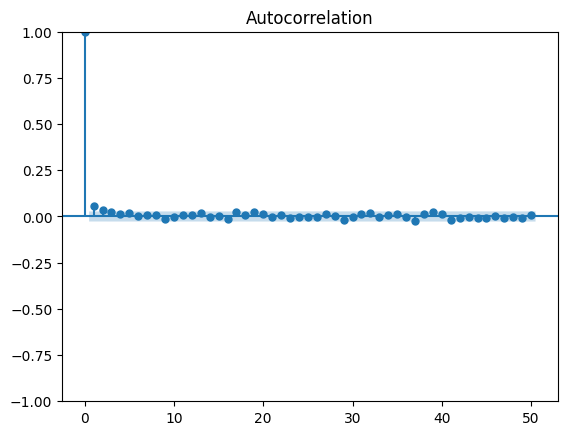

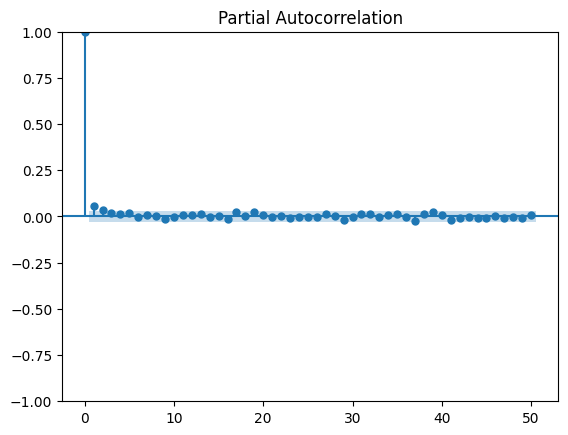

In [3]:
plot_acf(timeseries, lags=50)
plot_pacf(timeseries, lags=50)
plt.show()

In [4]:
#ARIMA AUTO
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()
test_forecast = model_fit.get_forecast(steps=len(test))
predicted_values = test_forecast.predicted_mean.values
test_forecast_series = pd.Series(predicted_values, index=test.index)

mse = mean_squared_error(test, test_forecast_series)
rmse = mse**0.5
print('RMSE:', rmse)


RMSE: 15.511531037684936


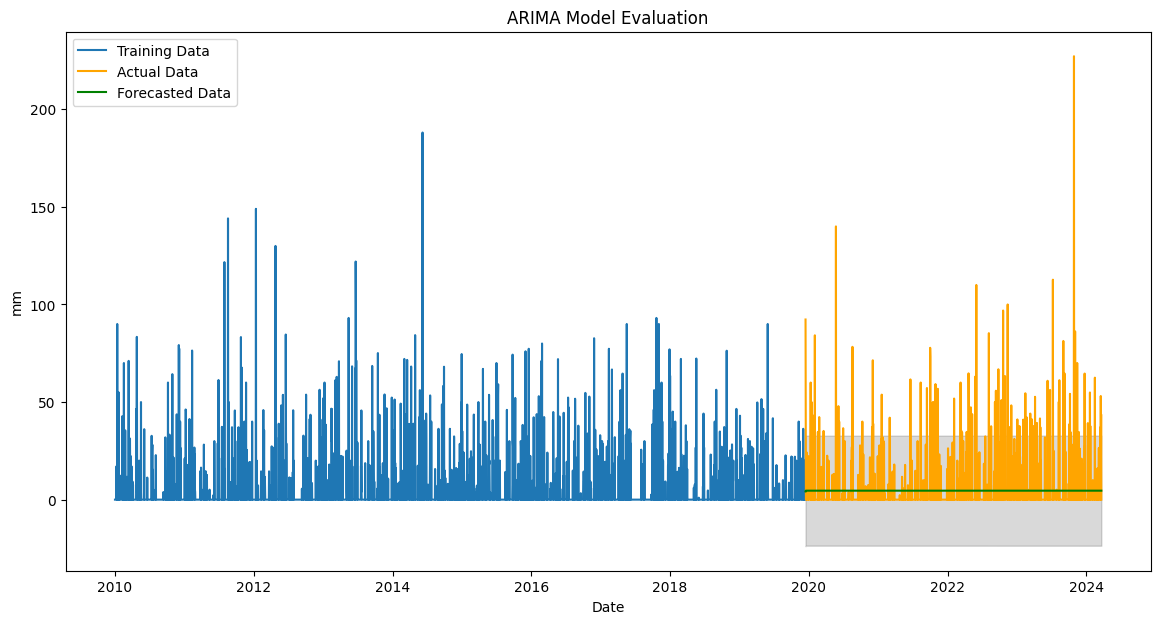

In [5]:

# Plot
plt.figure(figsize=(14,7))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('mm')
plt.legend()
plt.show()


In [ ]:
#import pmdarima as pm

#auto_model = pm.auto_arima(train,
                           start_p=1, start_q=1,
                           max_p=5, max_q=5,
                           #m=5,  # Frequência da sazonalidade (7 dias)
                           d=False,
                           seasonal=True, 
                           start_P=0,
                           D=2,  # Geralmente D=1 é um bom ponto de partida para sazonalidade
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

#print("\nMelhor modelo encontrado:")
#print(auto_model.summary())

# --- 3. PREVISÃO E AVALIAÇÃO ---

# CORREÇÃO: Usar o modelo encontrado pelo auto_arima para prever
#forecast_log, conf_int_log = auto_model.predict(n_periods=len(test),
                                                return_conf_int=True)

#rmse = np.sqrt(mean_squared_error(test, forecast_log))
#print(f"\nRMSE (Root Mean Squared Error): {rmse:.4f}")